In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
import operator
import os
import unicodedata

from os import path
from tabulate import tabulate

pylab.rcParams['figure.figsize'] = 18, 12  # that's default image size for this interactive session

In [2]:
experiments = [
    "bopos_decisiontree",
    "bopos_logreg",
    "bopos_mlp_1_0",
    "bopos_mlp_1_5",
    "bopos_mlp_2_0",
    "bopos_mlp_2_5",
    "bopos_randomforest",
    "bow_decisiontree",
    "bow_logreg",
    "bow_mlp_1_0",
    "bow_mlp_1_5",
    "bow_mlp_2_0",
    "bow_mlp_2_5",
    "bow_randomforest",
    "mfl",
    "pos_decisiontree",
    "pos_logreg",
    "pos_mlp_1_0",
    "pos_mlp_1_5",
    "pos_mlp_2_0",
    "pos_mlp_2_5",
    "pos_randomforest",
    "wordvec_decisiontree",
    "wordvec_logreg",
    "wordvec_mlp_1_0",
    "wordvec_mlp_1_5",
    "wordvec_mlp_2_0",
    "wordvec_mlp_2_5",
    "wordvec_randomforest",
    "wordvecpos_decisiontree",
    "wordvecpos_logreg",
    "wordvecpos_mlp_1_0",
    "wordvecpos_mlp_1_5",
    "wordvecpos_mlp_2_0",
    "wordvecpos_mlp_2_5",
    "wordvecpos_randomforest",
]

directory = "../resources/results/results_supervised/"
verbs_file = "../resources/sensem/verbs"

In [3]:
with open(verbs_file, "r") as f:
    verbs = unicodedata.normalize("NFC", f.read().decode("utf-8")).strip().split()

accuracies = {e: list() for e in experiments}
most_common_precision = {e: list() for e in experiments}
less_common_recall = {e: list() for e in experiments}

for vidx, verb in enumerate(verbs):
    vidx = "{:03}".format(vidx)

    if not path.isdir(path.join(directory, vidx)):
        continue

    for experiment in experiments:
        accuracy_file = path.join(directory, vidx, experiment, "accuracy")
        mcp_file = path.join(directory, vidx, experiment, "most_common_precision")
        lcr_file = path.join(directory, vidx, experiment, "less_common_recall")

        with open(accuracy_file, "r") as f:
            accuracies[experiment].append(
                np.mean([float(acc.strip()) for acc in f.readlines()])
            )
            
        with open(mcp_file, "r") as f:
            most_common_precision[experiment].append(
                np.mean([float(mcp.strip()) for mcp in f.readlines()])
            )
            
        with open(lcr_file, "r") as f:
            less_common_recall[experiment].append(
                np.mean([float(lcr.strip()) for lcr in f.readlines()])
            )

In [4]:
best_experiments_accuracy =\
    sorted([(e, np.mean(acc)) for e, acc in accuracies.items()], key=operator.itemgetter(1), reverse=True)
best_experiments_mcp =\
    sorted([(e, np.mean(mcp)) for e, mcp in most_common_precision.iteritems()], key=operator.itemgetter(1), reverse=True)
best_experiments_lcr =\
    sorted([(e, np.mean(lcr)) for e, lcr in less_common_recall.iteritems()], key=operator.itemgetter(1), reverse=True)

def get_boxplot_accuracies():
    boxplot_accuracies = []

    for experiment, accuracy in best_experiments_accuracy:
        boxplot_accuracies.append(accuracies[experiment])

    return boxplot_accuracies

def get_boxplot_mcp():
    boxplot_mcp = []

    for experiment, mcp in best_experiments_mcp:
        boxplot_mcp.append(most_common_precision[experiment])

    return boxplot_mcp

def get_boxplot_lcr():
    boxplot_lcr = []

    for experiment, lcr in best_experiments_lcr:
        boxplot_lcr.append(less_common_recall[experiment])

    return boxplot_lcr

wordvecpos_mlp_2_0: 0.761
wordvecpos_mlp_2_5: 0.760
wordvec_logreg: 0.759
wordvec_mlp_2_5: 0.757
wordvecpos_logreg: 0.756
wordvec_mlp_2_0: 0.756
wordvecpos_mlp_1_0: 0.753
wordvecpos_mlp_1_5: 0.752
bow_logreg: 0.747
wordvec_mlp_1_0: 0.745


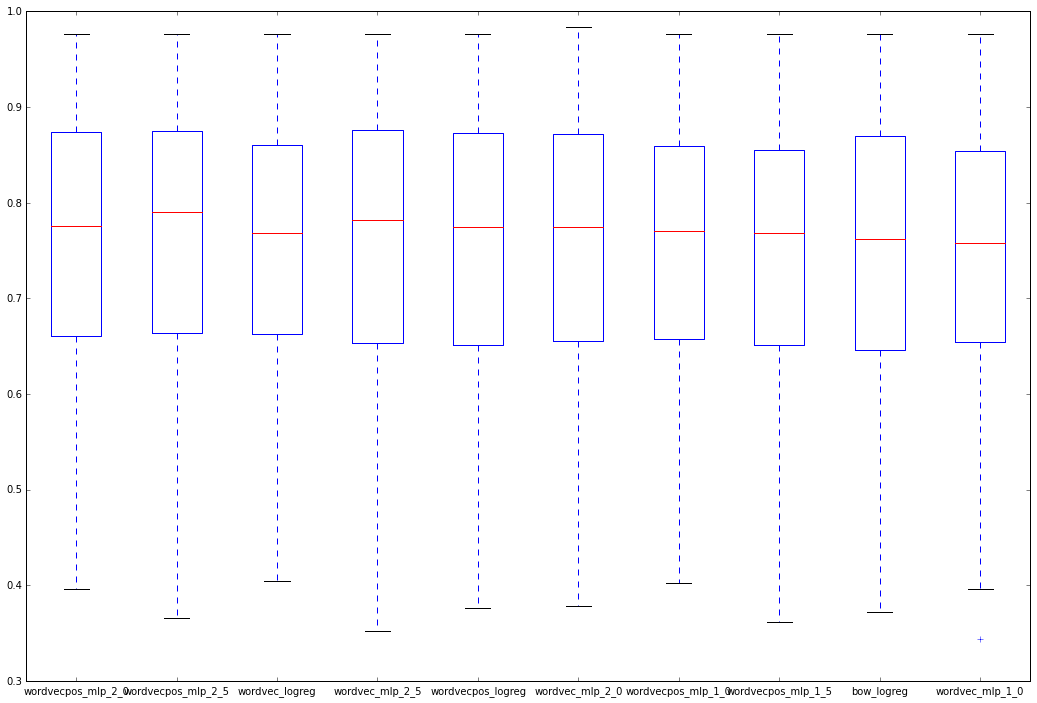

In [5]:
plt.boxplot(get_boxplot_accuracies()[:10], labels=zip(*best_experiments_accuracy)[0][:10])

for experiment, value in best_experiments_accuracy[:10]:
    print "{}: {:.03f}".format(experiment, value)

wordvecpos_mlp_2_0: 0.782
wordvecpos_mlp_2_5: 0.781
wordvec_mlp_2_0: 0.775
wordvec_mlp_2_5: 0.774
bow_decisiontree: 0.773
wordvecpos_logreg: 0.772
bow_logreg: 0.770
wordvecpos_decisiontree: 0.767
bopos_logreg: 0.764
wordvec_decisiontree: 0.763


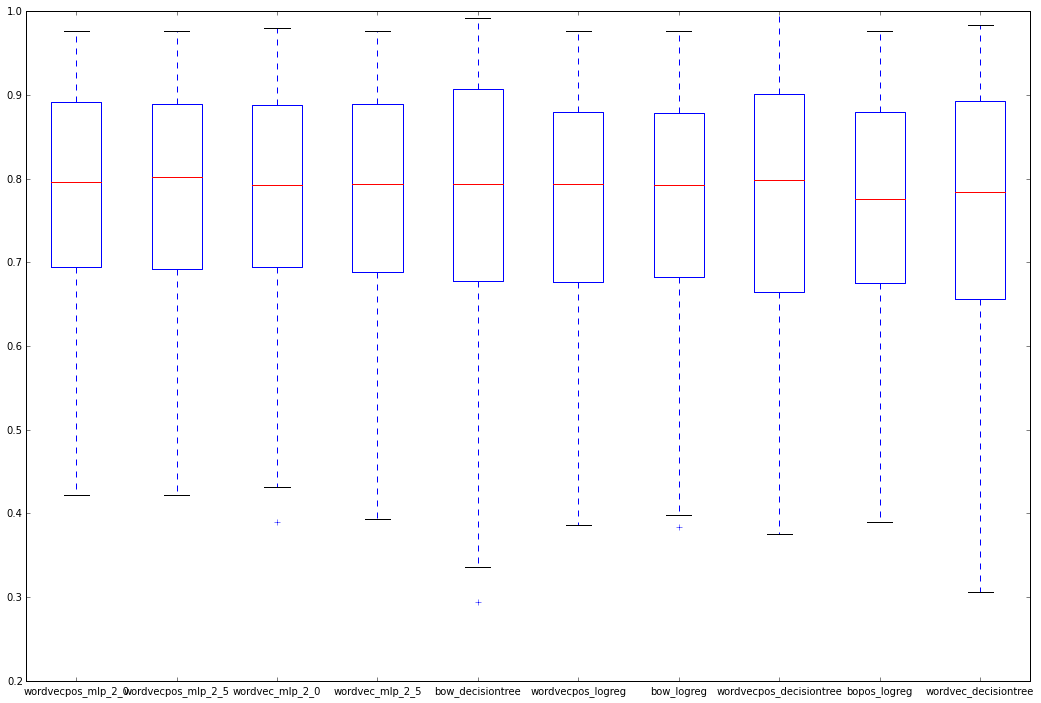

In [6]:
plt.boxplot(get_boxplot_mcp()[:10], labels=zip(*best_experiments_mcp)[0][:10])

for experiment, value in best_experiments_mcp[:10]:
    print "{}: {:.03f}".format(experiment, value)

bow_decisiontree: 0.337
wordvecpos_decisiontree: 0.325
wordvec_decisiontree: 0.318
bopos_decisiontree: 0.316
bow_logreg: 0.269
wordvecpos_mlp_2_0: 0.268
pos_decisiontree: 0.262
bopos_logreg: 0.261
wordvecpos_mlp_2_5: 0.260
wordvec_mlp_2_5: 0.256


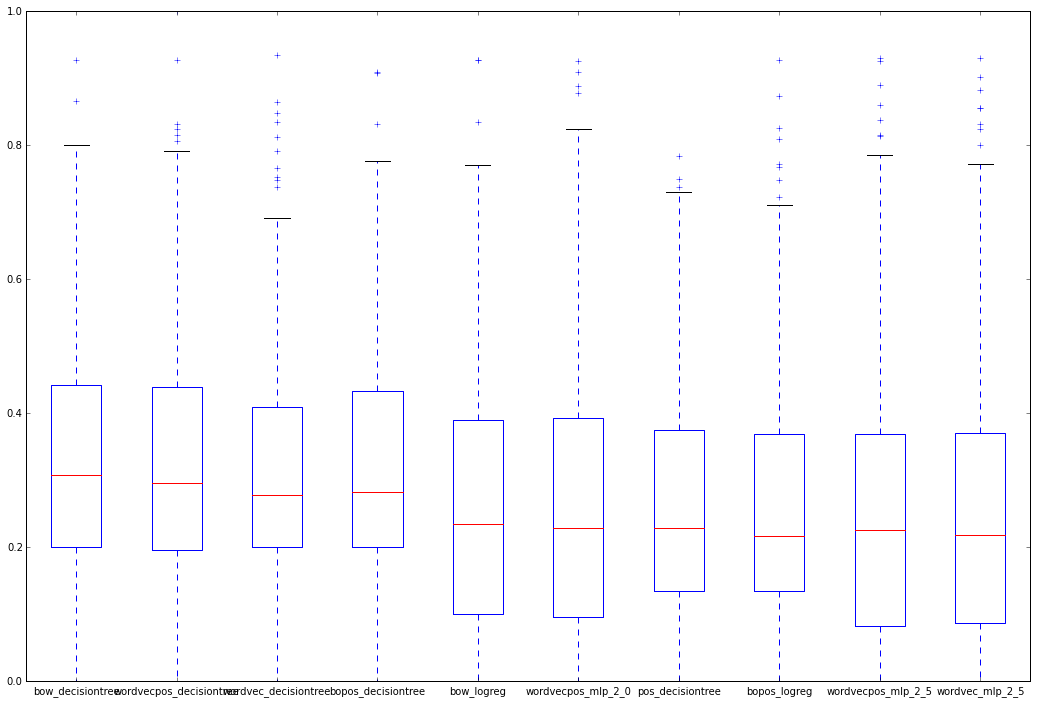

In [7]:
plt.boxplot(get_boxplot_lcr()[:10], labels=zip(*best_experiments_lcr)[0][:10])

for experiment, value in best_experiments_lcr[:10]:
    print "{}: {:.03f}".format(experiment, value)

In [8]:
mean_accuracies = dict(best_experiments_accuracy)
mean_mcp = dict(best_experiments_mcp)
mean_lcr = dict(best_experiments_lcr)

header = ["Experiment", "Accuracy Mean", "MFC Precision Mean", "LFC Recall Mean"]
table = []

for experiment in experiments:
    table.append([
            experiment,
            mean_accuracies[experiment],
            mean_mcp[experiment],
            mean_lcr[experiment]
        ])

print tabulate(table, header, floatfmt=".3f")

Experiment                 Accuracy Mean    MFC Precision Mean    LFC Recall Mean
-----------------------  ---------------  --------------------  -----------------
bopos_decisiontree                 0.669                 0.762              0.316
bopos_logreg                       0.736                 0.764              0.261
bopos_mlp_1_0                      0.664                 0.665              0.006
bopos_mlp_1_5                      0.665                 0.666              0.006
bopos_mlp_2_0                      0.662                 0.662              0.005
bopos_mlp_2_5                      0.660                 0.658              0.004
bopos_randomforest                 0.716                 0.745              0.214
bow_decisiontree                   0.685                 0.773              0.337
bow_logreg                         0.747                 0.770              0.269
bow_mlp_1_0                        0.680                 0.678              0.029
bow_mlp_1_5     